# Overview:  HW3 - Question 4

In this coding question, you'll implement a classifier with logistic regression
$$ F(w) = \frac{1}{N} \sum_{i=1}^N \log( 1 + e^{-\langle w, x_i \rangle y_i} ). $$

For this problem, I would suggest using functions to prepare the dataset, run gradient descent, and return classification error.  By doing this, you only have to write the code one time and just use the functions to return results for part (4c).

# Loading MNIST Data

In this section, you will learn to load MNIST data.  If you do not have tensorflow available on your jupyter notebook, uncomment the next cell, run it, restart the kernel, and comment the next cell once more.

In [ ]:
#!pip3 install scikit-learn

In [1]:
# import statements
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.datasets import fetch_openml

In [2]:
# this cell will take a minute to run depending on your internet connection
X, y = fetch_openml('mnist_784', version=1, return_X_y=True) # getting data from online
print('X shape:', X.shape, 'y shape:', y.shape)

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/datasets/_openml.py:1022: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


X shape: (70000, 784) y shape: (70000,)


In [4]:
# this cell processes some of the data
#y = np.array(y) #need this

digits = {j:[] for j in range(10)}
for j in range(len(y)): # takes data assigns it into a dictionary
    #digits[int(y[j])].append(X[j].reshape(28,28))
    #added the following 3 lines cause the above line wouldnt work
    current_y = int(y.iloc[j])
    current_X = np.array(X.iloc[j]).reshape(28,28)
    digits[current_y].append(current_X)

digits = {j:np.stack(digits[j]) for j in range(10)} # stack everything to be one numpy array
for j in range(10):
    print('Shape of data with label', j, ':', digits[j].shape )

Shape of data with label 0 : (6903, 28, 28)
Shape of data with label 1 : (7877, 28, 28)
Shape of data with label 2 : (6990, 28, 28)
Shape of data with label 3 : (7141, 28, 28)
Shape of data with label 4 : (6824, 28, 28)
Shape of data with label 5 : (6313, 28, 28)
Shape of data with label 6 : (6876, 28, 28)
Shape of data with label 7 : (7293, 28, 28)
Shape of data with label 8 : (6825, 28, 28)
Shape of data with label 9 : (6958, 28, 28)


# (4a) Plotting

Display one randomly selected image from your training data for each digit class. Provide the index number for each image.

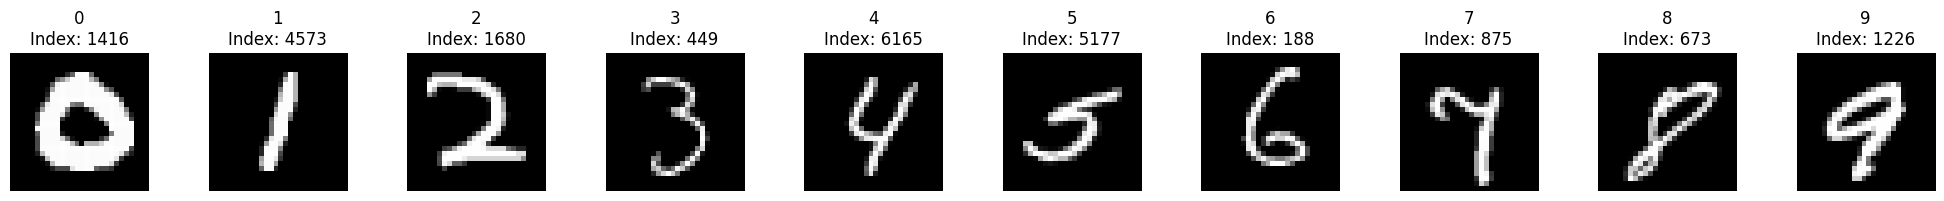

In [5]:
# plot data here (this should have an output)
fig, axarr = plt.subplots(1, 10, figsize=(20, 2))

random_indices = {}
for j in range(10):
    idx = np.random.randint(digits[j].shape[0])
    axarr[j].imshow(digits[j][idx], cmap='gray')
    axarr[j].axis('off')
    axarr[j].set_title(str(j) + "\nIndex: " + str(idx))
    random_indices[j] = idx

plt.tight_layout()
plt.show()


# (4b) Label data

Select the first 500 examples of 0’s and 1’s for this example, those will form the training data $(x_i , y_i) \in \mathbb{R}^{784} \times \{−1,1\}, i = 1,...,1000$. Assign label $y_i = 1$ for 1s and $y_i = −1$ for 0s.  You can use __np.vectorize__ here.

In [6]:
# create dataset here (essentially just create a numpy array of 1's and -1's for the labels)
# Selecting the first 500 examples of 0's and 1's
data_0 = digits[0][:500]
data_1 = digits[1][:500]

# Creating the labels: -1 for 0's and 1 for 1's
labels_0 = np.full(data_0.shape[0], -1)
labels_1 = np.full(data_1.shape[0], 1)

# Combining the data and labels
X_train = np.vstack([data_0, data_1]).reshape(1000, 784)  # Stack the data and reshape to (1000, 784)
y_train = np.hstack([labels_0, labels_1])  # Combine the labels

# Now, X_train contains the training data and y_train contains the corresponding labels.


# (4bi) Running Gradient Descent

Implement and run a Gradient Descent algorithm, with step-size $\mu = 10^{-4}$, to optimize the function above associated with this setup. You should run your algorithm for at least $T = 10,000$ iterations, but if your computer can handle it try $T=100,000$ or until a reasonable stopping criterion is satisfied.  Provide a plot showing the value of $F(w)$ at each iteration. Also, feel free to adjust $\mu$ to be larger / smaller if the plot does not match your expectations.

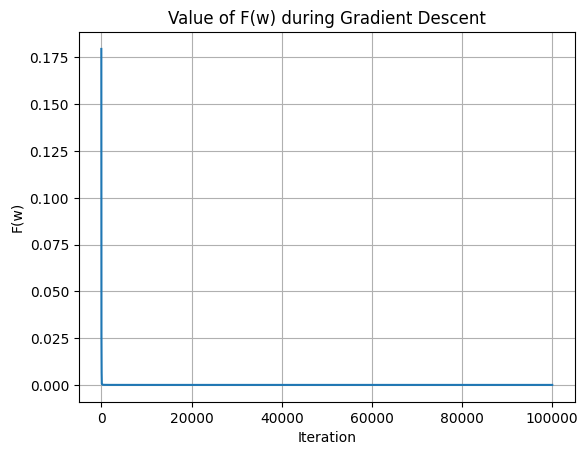

In [10]:
# implement gradient descent here
def compute_gradient(w, X, y):
    """
    Compute the gradient of the logistic regression objective.
    """
    N = X.shape[0]
    z = y * np.dot(X, w)
    dz = -y / (1 + np.exp(z))
    grad = np.dot(dz, X) / N
    return grad

def logistic_regression_gradient_descent(X, y, mu=1e-4, T=100000):
    """
    Perform gradient descent to optimize the logistic regression objective.
    """
    w = np.zeros(X.shape[1])  # Initialize weights to zero
    F_values = []  # List to store values of F(w) for each iteration
    
    for t in range(T):
        grad = compute_gradient(w, X, y)
        w = w - mu * grad  # Update rule
        
        # Calculate and store the current value of F(w)
        F_value = np.mean(np.log(1 + np.exp(-y * np.dot(X, w))))
        F_values.append(F_value)
    
    return w, F_values

# Running gradient descent
w_opt, F_values = logistic_regression_gradient_descent(X_train, y_train)

# Plotting the value of F(w) at each iteration
plt.plot(F_values)
plt.xlabel('Iteration')
plt.ylabel('F(w)')
plt.title('Value of F(w) during Gradient Descent')
plt.grid(True)
plt.show()



# (4bii) Discussion about gradient descent

Comment on the resulting plot. In particular, does the shape of $F(w)$ suggest you've successfully converged to a local or global minimum?  Does it appear you chose a good stopping criteria?  Explain whether your
answers to these questions are consistent with the theory we discussed in class (and in the
notes). Be specific i.e., point to a specific theorem (or theorems) and indicate
why it does or does not explain the behavior of the algorithm.  Would the theory dictate a different choice of $\mu$ than the one we used?

Put discussion here: By the plot shown above, it seems that we have converged to a global minimum. We are iterating 100,000 times and see no change of F(w). We could have even used 10,000 instead of 100,000 and we would have reached the same result. By the following theorem: Let f : R^n --> R be convex and continuously differentiable function. Then x* is a global minimum iff grad(f(x*)) = 0. From above we see that f(w) = 0, and thus w is a global min. It seems that our choice of mu was sufficient.

Now, use the $w$ you found from part (a) to classify the first 500 \emph{test} data points associated to
each of the 0 and 1 handwritten digits. Recall that you need to use the function $y = \text{sign}(w^T x)$
to classify. What was the classification error rate associated with the two digits on the test
data (this should be a number between 0 and 1)? What was it on the training data?  Does this relationship make sense?

In [11]:
# Classify and return the classification error
# Getting test data
X_test_0 = digits[0][500:1000].reshape(500, 784)  # Next 500 of 0's
X_test_1 = digits[1][500:1000].reshape(500, 784)  # Next 500 of 1's

y_test_0 = np.full(500, -1)  # Labels for 0's
y_test_1 = np.full(500, 1)   # Labels for 1's

# Combining the test data and labels
X_test = np.vstack([X_test_0, X_test_1])
y_test = np.hstack([y_test_0, y_test_1])

# Classification function
def classify(w, X):
    return np.sign(np.dot(X, w))

# Predictions on test and training data
y_pred_test = classify(w_opt, X_test)
y_pred_train = classify(w_opt, X_train)

# Classification error rate
error_rate_test = np.mean(y_pred_test != y_test)
error_rate_train = np.mean(y_pred_train != y_train)

print(f"Classification error rate on test data: {error_rate_test:.2f}")
print(f"Classification error rate on training data: {error_rate_train:.2f}")



Classification error rate on test data: 0.00
Classification error rate on training data: 0.00


# (4c) Repeat with 4s and 9s

Repeat parts (b)i. and (b)iii. for digits of 4s and 9s. Comment on the difference between the results and propose a reason as to why the performance did or did not change.

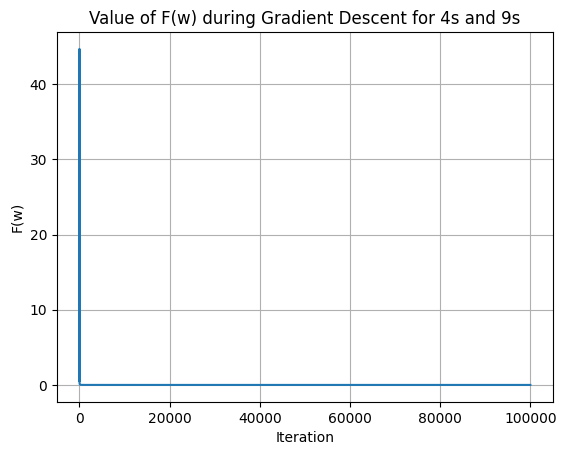

Classification error rate on test data for 4s and 9s: 0.04
Classification error rate on training data for 4s and 9s: 0.00


In [12]:
# Repeat here
# Selecting the first 500 examples of 4’s and 9’s for training
X_train_4 = digits[4][:500].reshape(500, 784)
X_train_9 = digits[9][:500].reshape(500, 784)

y_train_4 = np.full(500, -1)  # We'll use -1 for 4s
y_train_9 = np.full(500, 1)   # We'll use 1 for 9s

# Combining the training data and labels
X_train_49 = np.vstack([X_train_4, X_train_9])
y_train_49 = np.hstack([y_train_4, y_train_9])

# Running gradient descent for 4s and 9s
w_opt_49, F_values_49 = logistic_regression_gradient_descent(X_train_49, y_train_49)

# Plotting the value of F(w) at each iteration for 4s and 9s
plt.plot(F_values_49)
plt.xlabel('Iteration')
plt.ylabel('F(w)')
plt.title('Value of F(w) during Gradient Descent for 4s and 9s')
plt.grid(True)
plt.show()

# Getting test data for 4s and 9s
X_test_4 = digits[4][500:1000].reshape(500, 784)  # Next 500 of 4's
X_test_9 = digits[9][500:1000].reshape(500, 784)  # Next 500 of 9's

y_test_4 = np.full(500, -1)  # Labels for 4's
y_test_9 = np.full(500, 1)   # Labels for 9's

# Combining the test data and labels for 4s and 9s
X_test_49 = np.vstack([X_test_4, X_test_9])
y_test_49 = np.hstack([y_test_4, y_test_9])

# Predictions on test and training data for 4s and 9s
y_pred_test_49 = classify(w_opt_49, X_test_49)
y_pred_train_49 = classify(w_opt_49, X_train_49)

# Classification error rate for 4s and 9s
error_rate_test_49 = np.mean(y_pred_test_49 != y_test_49)
error_rate_train_49 = np.mean(y_pred_train_49 != y_train_49)

print(f"Classification error rate on test data for 4s and 9s: {error_rate_test_49:.2f}")
print(f"Classification error rate on training data for 4s and 9s: {error_rate_train_49:.2f}")


I believe performance changed because 4s and 9s are much more similar than 0s and 1s. The pixels overlap more when comparing a 4 to a 9, than when you compare a 0 to a 1.